# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import datetime as dt

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
market_df=pd.read_csv('marketing.csv')

In [5]:
market_df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [7]:
market_df.shape

(2240, 27)

In [9]:
market_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [11]:
market_df.isnull().sum()/len(market_df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [13]:
market_df['Income'].fillna(market_df['Income'].median(), inplace=True)

In [15]:
market_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [17]:
len(market_df[market_df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [19]:
market_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [21]:
market_df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [23]:
market_df['Marital_Status']=market_df['Marital_Status'].replace([ 'Married', 'Together'],'relationship')
market_df['Marital_Status']=market_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' ],'Single')

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [25]:
market_df['Total_Expenses']=market_df['MntWines']+market_df['MntFruits']+market_df['MntMeatProducts']+market_df['MntFishProducts']+market_df['MntSweetProducts']+market_df['MntGoldProds']

In [27]:
market_df['Total_Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [29]:
market_df['Num_Total_Purchases']= market_df['NumWebPurchases']+market_df['NumCatalogPurchases']+ market_df['NumStorePurchases']+market_df['NumDealsPurchases']

In [31]:
market_df['Kids']

KeyError: 'Kids'

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [33]:
market_df['Kids']=market_df['Kidhome']+market_df['Teenhome']

In [35]:
market_df['Num_Total_Purchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [37]:
market_df['TotalAcceptedCmp']=market_df['AcceptedCmp1']+market_df['AcceptedCmp2']+market_df['AcceptedCmp3']+market_df['AcceptedCmp4']+market_df['AcceptedCmp5']+market_df['Response']

In [39]:
market_df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [41]:
col_del=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Kidhome','Teenhome','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds' ,'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',  'NumDealsPurchases']
market_df=market_df.drop(col_del,axis=1)
market_df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,4/9/2012,58,7,0,1617,25,0,1
1,2174,1954,Graduation,Single,46344.0,8/3/2014,38,5,0,27,6,2,0
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,4,0,776,21,0,0
3,6182,1984,Graduation,relationship,26646.0,10/2/2014,26,6,0,53,8,1,0
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [43]:
market_df['age']=dt.datetime.today().year-market_df['Year_Birth']
df1 = market_df.drop('Year_Birth',axis=1)

In [45]:
df1.head(5)

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,5524,Graduation,Single,58138.0,4/9/2012,58,7,0,1617,25,0,1,67
1,2174,Graduation,Single,46344.0,8/3/2014,38,5,0,27,6,2,0,70
2,4141,Graduation,relationship,71613.0,21-08-2013,26,4,0,776,21,0,0,59
3,6182,Graduation,relationship,26646.0,10/2/2014,26,6,0,53,8,1,0,40
4,5324,PhD,relationship,58293.0,19-01-2014,94,5,0,422,19,1,0,43


### 13. Encode the categorical variables in the dataset

In [47]:
cate=['Education','Marital_Status']
lbl_encode=LabelEncoder()
for i in cate:
    market_df[i]=market_df[[i]].apply(lbl_encode.fit_transform)

### 14. Standardize the columns, so that values are in a particular range

In [49]:
ds=market_df.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds =pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("All features are now scaled")

All features are now scaled


In [51]:
scaled_ds

,ID,Year_Birth,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.020999,-0.985345,0.235696,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-1.053058,-1.235733,-0.235454,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.447070,-0.317643,0.773999,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,0.181716,1.268149,-1.022355,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,-0.082614,1.017761,0.241888,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625983,-0.150717,0.358936,-0.107383,-0.130463,-0.097282,1.221032,0.408829,0.065928,-0.501912,0.150717
2236,-0.490200,-1.903435,0.470432,0.237969,0.693904,-0.097282,-0.268717,0.929970,2.726794,0.621248,1.903435
2237,0.516905,1.017761,0.189476,1.446700,0.281720,-0.097282,1.054951,0.539114,-1.264505,0.621248,-1.017761
2238,0.814199,-1.068807,0.679401,-1.419719,-0.954831,-0.097282,0.393948,1.060255,0.065928,-0.501912,1.068807


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [53]:
cov_matrix = np.cov(scaled_ds.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00044663e+00  2.76368349e-05  1.30015953e-02 -4.65448809e-02
  -7.44950801e-03  3.38981712e-02 -1.80618275e-02 -2.38449472e-02
  -1.45948170e-04 -3.69007040e-02 -2.76368349e-05]
 [ 2.76368349e-05  1.00044663e+00 -1.60971069e-01 -1.98799637e-02
   1.21193363e-01 -3.01410006e-02 -1.11356106e-01 -1.68379081e-01
  -9.02395543e-02  8.30618470e-03 -1.00044663e+00]
 [ 1.30015953e-02 -1.60971069e-01  1.00044663e+00 -4.06259704e-03
  -5.50030538e-01 -2.71990386e-02  6.65071764e-01  5.63701723e-01
  -2.90987451e-01  2.87237240e-01  1.60971069e-01]
 [-4.65448809e-02 -1.98799637e-02 -4.06259704e-03  1.00044663e+00
  -2.14542684e-02  1.32369878e-02  2.04417334e-02  5.74294350e-03
   1.80614498e-02 -8.90020337e-02  1.98799637e-02]
 [-7.44950801e-03  1.21193363e-01 -5.50030538e-01 -2.14542684e-02
   1.00044663e+00  1.97773363e-02 -5.00441309e-01 -3.12427954e-01
   4.18606158e-01 -1.28367257e-01 -1.21193363e-01]
 [ 3.38981712e-02 -3.01410006e-02 -2.71990386e-02  1.32369878e-02

In [55]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 9.44011894e-03  7.68531318e-03 -4.44715961e-03 -2.82486284e-02
  -1.08550391e-02 -5.87246984e-01 -5.18306564e-01 -4.87348408e-01
  -3.67309357e-01  1.13977529e-01  1.16391899e-17]
 [ 1.74607396e-01 -6.62749756e-01 -3.60432733e-03 -1.86081420e-02
   5.06926626e-02  3.17761189e-02 -5.52812205e-02  1.00406714e-02
  -4.10173732e-02 -1.46618699e-01  7.07106781e-01]
 [-4.48860936e-01 -3.51894445e-02 -1.11393066e-01  7.35109093e-01
   3.75440288e-01  7.66545567e-03 -7.19237680e-02 -5.60166449e-02
  -1.06639375e-02 -3.08306645e-01 -1.47638052e-16]
 [ 1.38420056e-03  4.22930758e-02 -3.75840929e-02  1.59564183e-02
   5.74495615e-02  7.52007657e-01 -4.42040635e-01 -7.72155435e-02
  -3.95629820e-01  2.64274709e-01 -7.03681352e-17]
 [ 3.74406875e-01  5.76037590e-02  9.86019252e-02  5.21474269e-01
  -4.72087580e-01 -7.99868595e-02  2.28755861e-01  2.15843020e-01
  -4.96635750e-01  3.80048816e-03 -1.65090717e-16]
 [ 2.28325615e-02  5.89698299e-02  7.11326841e-03  6.94643647e-03
  

In [57]:
total = sum(eig_vals)
print(total)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

11.004912907548013
Variance Explained:  [29.367629193902133, 18.16228436051774, 9.624009735647004, 9.36036972760609, 8.862855489680774, 7.815317991707674, 7.021422271409448, 5.3038324874624925, 3.036547326550245, 1.4457314155163956, -1.1421875626585906e-15]
Cummulative Variance Explained:  [ 29.36762919  47.52991355  57.15392329  66.51429302  75.37714851
  83.1924665   90.21388877  95.51772126  98.55426858 100.
 100.        ]


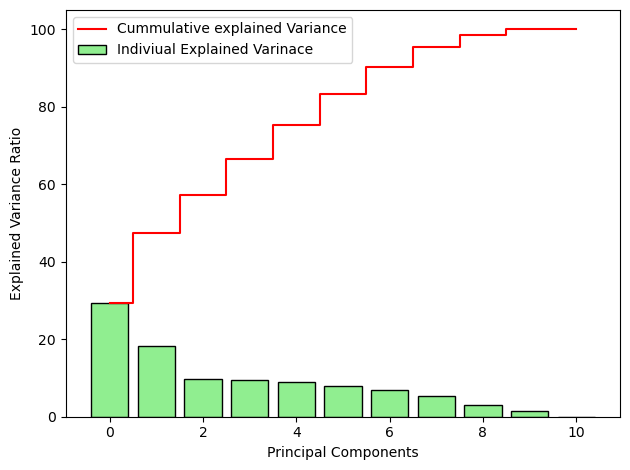

In [59]:
plt.bar(range(11),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(11), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [61]:
pca=PCA(n_components = 8)
pca.fit(scaled_ds)

PCA(n_components=8)

In [63]:
data_pca = pca.transform(scaled_ds)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.147972,-0.680192,0.091416,-0.337706,0.322396,0.811549,-0.636588,-1.603560
1,-1.145596,-2.196906,0.328862,-0.809519,0.237127,-0.852466,0.241065,1.032970
2,1.403830,-0.018746,-0.158504,-0.249635,-0.152066,-1.169475,0.360513,-0.763851
3,-2.000829,1.439573,-0.582727,-0.115437,-0.236259,-0.599298,0.098446,-0.051492
4,-0.273631,1.178078,1.425498,0.888564,-0.307973,0.557298,0.492984,0.020604


In [65]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=8)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,23535.566518
1,2,18081.610058
2,3,16176.374476
3,4,14029.871705
4,5,12794.365798
5,6,11736.904108
6,7,11045.872862
7,8,10468.163380
8,9,10035.060927
9,10,9668.311824


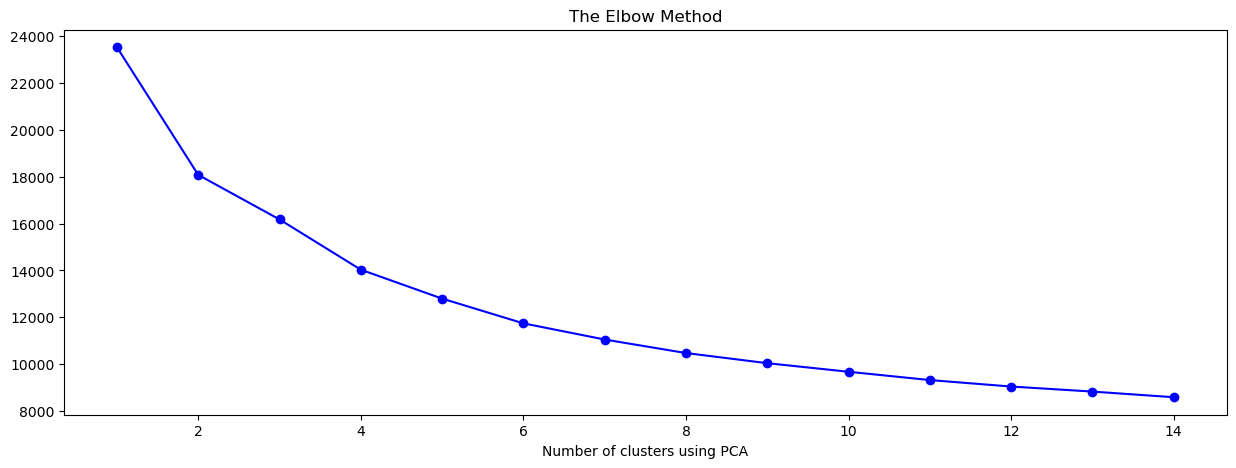

In [67]:
plt.figure(figsize=[15,5])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init=15, random_state=100)

In [71]:
kmeans.labels_

array([0, 2, 0, ..., 0, 2, 2])

In [73]:
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
kmeans_df=data_pca.join(df_labels)
kmeans_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,2.147972,-0.680192,0.091416,-0.337706,0.322396,0.811549,-0.636588,-1.603560,0
1,-1.145596,-2.196906,0.328862,-0.809519,0.237127,-0.852466,0.241065,1.032970,2
2,1.403830,-0.018746,-0.158504,-0.249635,-0.152066,-1.169475,0.360513,-0.763851,0
3,-2.000829,1.439573,-0.582727,-0.115437,-0.236259,-0.599298,0.098446,-0.051492,1
4,-0.273631,1.178078,1.425498,0.888564,-0.307973,0.557298,0.492984,0.020604,1


In [75]:
kmeans_df['Labels'].value_counts()

Labels
1    898
0    694
2    648
Name: count, dtype: int64

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

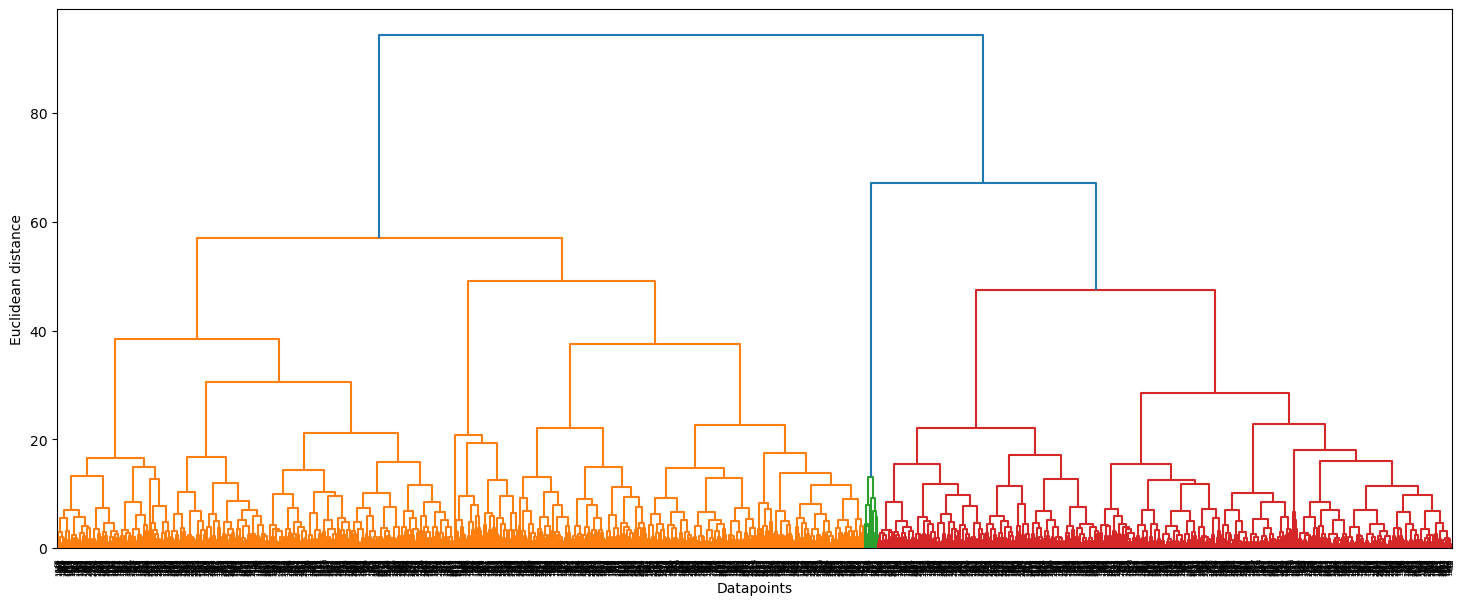

In [77]:
plt.figure(figsize=[18,7])
merg = linkage(data_pca, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [79]:
from sklearn.metrics import silhouette_score
kmeans_score = []
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(data_pca)
    labels = hier.fit_predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.18810225447478554
3 0.19249216038592648
4 0.16357787807217505
5 0.1627734273972836
6 0.13397584504022056
7 0.1266017457743529
8 0.13433030292848802
9 0.13389141495347012
10 0.11695634906630456
11 0.10451812362566798
12 0.10180049171825237
13 0.10279841761811137
14 0.1031908391490118


In [80]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(data_pca)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

In [ ]:
df_hier=market_df.join(df_label1)
df_hier

### Visualization and Interpretation of results

In [ ]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

-----
## Happy Learning
-----